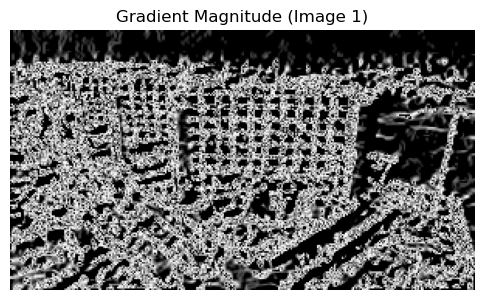

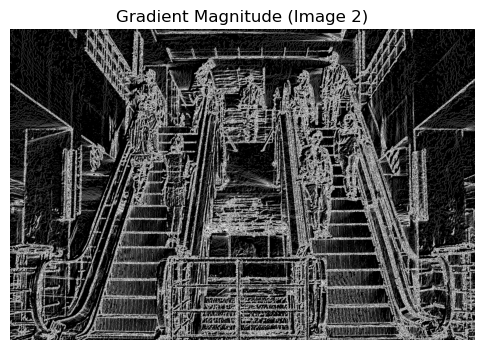

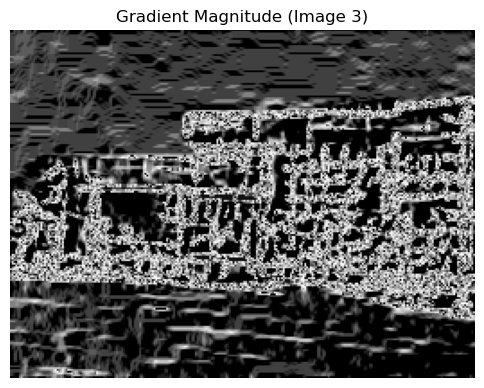

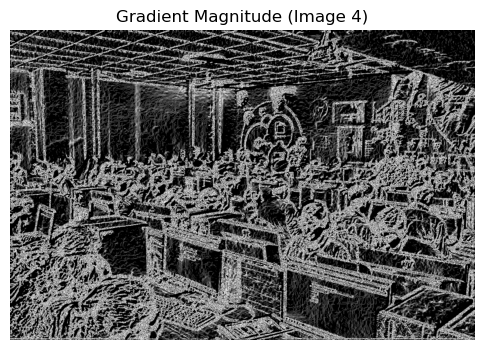

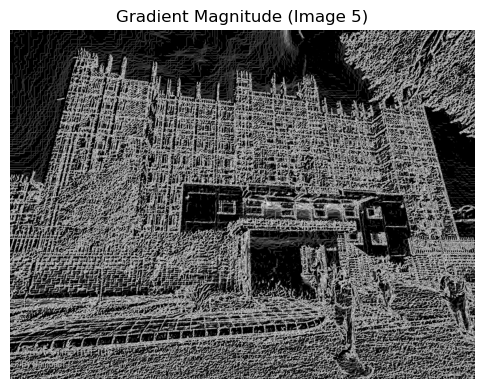

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define Gaussian kernel size and sigma
kernel_size = 5
sigma = 1.4

# Define Sobel operators for gradient calculation
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Define low and high thresholds for hysteresis
low_threshold = 30
high_threshold = 80

# Function for non-maximum suppression
def non_max_suppression(gradient_magnitude, gradient_direction):
    rows, cols = gradient_magnitude.shape
    result = np.zeros_like(gradient_magnitude, dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = gradient_direction[i, j]
            m = gradient_magnitude[i, j]

            # Determine the two neighboring pixels
            if (0 <= angle < np.pi / 8) or (15 * np.pi / 8 <= angle <= 2 * np.pi):
                neighbor1 = gradient_magnitude[i, j + 1]
                neighbor2 = gradient_magnitude[i, j - 1]
            elif (np.pi / 8 <= angle < 3 * np.pi / 8) or (9 * np.pi / 8 <= angle < 11 * np.pi / 8):
                neighbor1 = gradient_magnitude[i - 1, j + 1]
                neighbor2 = gradient_magnitude[i + 1, j - 1]
            elif (3 * np.pi / 8 <= angle < 5 * np.pi / 8) or (11 * np.pi / 8 <= angle < 13 * np.pi / 8):
                neighbor1 = gradient_magnitude[i - 1, j]
                neighbor2 = gradient_magnitude[i + 1, j]
            else:
                neighbor1 = gradient_magnitude[i - 1, j - 1]
                neighbor2 = gradient_magnitude[i + 1, j + 1]

            # Perform non-maximum suppression
            if m >= neighbor1 and m >= neighbor2:
                result[i, j] = m

    return result

# Edge tracking by hysteresis
def edge_tracking_hysteresis(gradient_magnitude, low_threshold, high_threshold):
    # Create an array to store the edge map
    edge_map = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    
    # Find strong edges above the high threshold
    strong_edges = (gradient_magnitude >= high_threshold)
    
    # Find weak edges between the low and high thresholds
    weak_edges = (gradient_magnitude >= low_threshold) & (gradient_magnitude < high_threshold)
    
    # Set the strong edges in the edge map
    edge_map[strong_edges] = 255
    
    # Implement edge tracking by hysteresis for weak edges using DFS
    for i in range(1, edge_map.shape[0] - 1):
        for j in range(1, edge_map.shape[1] - 1):
            if edge_map[i, j] == 255:  # Start DFS from a strong edge pixel
                dfs(i, j)
    
    return edge_map

def dfs(i, j):
    # Implement depth-first search to track and connect weak edges
    pass

# List of image paths
image_paths = [
    'C:\\Users\\jagad\\OneDrive\\Pictures\\CT\\front.jpeg',
    'C:\\Users\\jagad\\OneDrive\\Pictures\\CT\\escalator.jpg',
    'C:\\Users\\jagad\\OneDrive\\Pictures\\CT\\main.jpeg',
    'C:\\Users\\jagad\\OneDrive\\Pictures\\CT\\lab.jpeg',
    'C:\\Users\\jagad\\OneDrive\\Pictures\\CT\\hostel.jpg'
]

# Loop through the image paths
for i, image_path in enumerate(image_paths, start=1):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Gaussian smoothing using matrix convolution
    gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_kernel = np.outer(gaussian_kernel, gaussian_kernel.T)
    smoothed_image = cv2.filter2D(image, -1, gaussian_kernel)

    # Calculate gradients
    gradient_x = cv2.filter2D(smoothed_image, -1, sobel_x)
    gradient_y = cv2.filter2D(smoothed_image, -1, sobel_y)

    # Compute gradient magnitude and direction
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Apply non-maximum suppression
    suppressed_gradient = non_max_suppression(gradient_magnitude, gradient_direction)

    # Apply edge tracking by hysteresis
    edge_map = edge_tracking_hysteresis(suppressed_gradient, low_threshold, high_threshold)

    # Ensure the edge map has the same dimensions as the original image
    if edge_map.shape != image.shape:
        edge_map = cv2.resize(edge_map, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Display the gradient magnitude
    plt.figure(figsize=(6, 6))
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title(f'Gradient Magnitude (Image {i})'), plt.axis('off')
    plt.show()
